In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor, Ridge)
from pandas_profiling import ProfileReport

In [76]:
df = pd.read_csv('../data/final_eda_base_data.csv', index_col= 0)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    10005 non-null  float64
 1   no_of_Redemption_12M_1               10005 non-null  float64
 2   no_of_sales_12M_10K                  10005 non-null  float64
 3   no_of_Redemption_12M_10K             10005 non-null  float64
 4   no_of_funds_sold_12M_1               10005 non-null  float64
 5   no_of_funds_redeemed_12M_1           10005 non-null  float64
 6   no_of_fund_sales_12M_10K             10005 non-null  float64
 7   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 8   no_of_assetclass_sold_12M_1          10005 non-null  float64
 9   no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 10  no_of_assetclass_sales_12M_10K       10005 non-null  float64
 11  no_of_assetclass_Redemption_

In [78]:
#df.drop(df.iloc[:, 22:40], inplace = True, axis=1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    10005 non-null  float64
 1   no_of_Redemption_12M_1               10005 non-null  float64
 2   no_of_sales_12M_10K                  10005 non-null  float64
 3   no_of_Redemption_12M_10K             10005 non-null  float64
 4   no_of_funds_sold_12M_1               10005 non-null  float64
 5   no_of_funds_redeemed_12M_1           10005 non-null  float64
 6   no_of_fund_sales_12M_10K             10005 non-null  float64
 7   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 8   no_of_assetclass_sold_12M_1          10005 non-null  float64
 9   no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 10  no_of_assetclass_sales_12M_10K       10005 non-null  float64
 11  no_of_assetclass_Redemption_

In [80]:
##Prepare the test train split

In [81]:
X = df.drop(['sales_2019', 'new_fund_2019','Firm name'], axis=1)
y = df['sales_2019']

In [82]:
X = (X-X.mean())/X.std()

In [83]:
#draw histogram to see the distribution

In [84]:
## Decreasing the random state to 12 yeilds a better performance - .50 score on Test data

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

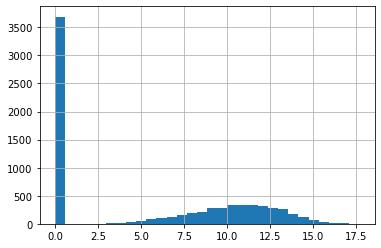

In [86]:
np.log1p(y_train).hist(bins=30);

In [87]:
pred_baseline = np.ones(len(y_train))*np.mean(y_train)

In [88]:
r2_score(y_train, pred_baseline)

0.0

In [89]:
mean_squared_error(y_train, pred_baseline, squared= False)

1185311.8594254837

In [90]:
lr_pipeline = make_pipeline(PCA(0.8), Ridge(1000))

In [91]:
X_train.describe()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,...,Channel_Networker,Channel_Private Client Group,Sub channel_Affiliated,Sub channel_DCIO,Sub channel_Global,Sub channel_IBD,Sub channel_NACS,Sub channel_Other,Sub channel_RIA,Sub channel_USBT
count,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,...,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000
mean,0.003349,0.006208,0.002706,0.005432,-0.001315,-0.000869,0.006106,0.002350,-0.003570,-0.005516,...,0.003019,0.006211,0.003783,-0.009620,0.005775,-0.001061,-0.000583,0.005775,0.005252,-0.003331
std,1.070637,1.139727,1.075499,1.099537,1.000704,1.004148,1.006049,1.003367,1.000310,0.999332,...,1.044483,1.043123,1.069063,0.666767,1.154720,1.000393,0.999773,1.154720,1.017021,0.957555
min,-0.204003,-0.109508,-0.166503,-0.151742,-0.571424,-0.625797,-0.428836,-0.447401,-0.782473,-0.866220,...,-0.033175,-0.070151,-0.026459,-0.017318,-0.017318,-1.417010,-0.666092,-0.017318,-0.149588,-0.040020
25%,-0.204003,-0.109508,-0.166503,-0.151742,-0.571424,-0.625797,-0.428836,-0.447401,-0.782473,-0.866220,...,-0.033175,-0.070151,-0.026459,-0.017318,-0.017318,-1.417010,-0.666092,-0.017318,-0.149588,-0.040020
50%,-0.204003,-0.104287,-0.166503,-0.151742,-0.571424,-0.220574,-0.428836,-0.447401,-0.782473,0.089085,...,-0.033175,-0.070151,-0.026459,-0.017318,-0.017318,0.705641,-0.666092,-0.017318,-0.149588,-0.040020
75%,-0.122736,-0.067744,-0.097703,-0.070001,0.268955,0.184649,0.323092,0.288582,0.212778,1.044390,...,-0.033175,-0.070151,-0.026459,-0.017318,-0.017318,0.705641,1.501144,-0.017318,-0.149588,-0.040020
max,44.442297,63.330306,67.670684,72.025887,12.874634,12.746562,12.353947,14.272259,4.193782,3.910305,...,30.140581,14.253539,37.790779,57.737914,57.737914,0.705641,1.501144,57.737914,6.684345,24.984997


In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 6967 to 4367
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    7503 non-null   float64
 1   no_of_Redemption_12M_1               7503 non-null   float64
 2   no_of_sales_12M_10K                  7503 non-null   float64
 3   no_of_Redemption_12M_10K             7503 non-null   float64
 4   no_of_funds_sold_12M_1               7503 non-null   float64
 5   no_of_funds_redeemed_12M_1           7503 non-null   float64
 6   no_of_fund_sales_12M_10K             7503 non-null   float64
 7   no_of_funds_Redemption_12M_10K       7503 non-null   float64
 8   no_of_assetclass_sold_12M_1          7503 non-null   float64
 9   no_of_assetclass_redeemed_12M_1      7503 non-null   float64
 10  no_of_assetclass_sales_12M_10K       7503 non-null   float64
 11  no_of_assetclass_Redemption

In [93]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.8)), ('ridge', Ridge(alpha=1000))])

In [94]:
lr_pipeline.score(X_train, y_train)

0.4977529360893117

In [95]:
lr_pipeline.score(X_test, y_test)

0.4615112297044318

In [100]:
lr_pipeline.named_steps['pca'].n_components_

16

In [101]:
y_test_reg_preds = lr_pipeline.predict(X_test)

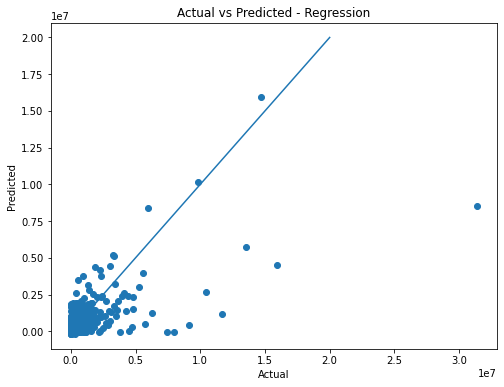

In [102]:
fig, axes = plt.subplots(figsize=(8, 6))

axes.scatter(x=y_test, y=y_test_reg_preds)

axes.plot([0, 20000000], [0,20000000])
axes.set_title("Actual vs Predicted - Regression")
axes.set_xlabel("Actual")
axes.set_ylabel("Predicted");

In [103]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 243 kB 4.7 MB/s eta 0:00:01


  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.10.1
    Uninstalling pandas-profiling-2.10.1:
      Successfully uninstalled pandas-profiling-2.10.1
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
